# TITLE OF PROJECT

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time:
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***



# OBTAIN

In [155]:
# import pandas as pd
# from sodapy import Socrata

# # Unauthenticated client only works with public data sets. Note 'None'
# # in place of application token, and no username or password:
# # client = Socrata("data.wa.gov", None)

# # Example authenticated client (needed for non-public datasets):
# client = Socrata('data.wa.gov',
#                  'C7QFByRWjTCvFfagF5Lt1QE50',
#                  username='427yub1zw87tmeol5eia062z',
#                  password='23yxf9ytpdtln3u8l4lxfv9u3y7gjidxh8kkw383xv7gbd4ogq')

# # First 2000 results, returned as JSON from API / converted to Python list of
# # dictionaries by sodapy.
# results = client.get("rpr4-cgyd", limit=2000)

# # Convert to pandas DataFrame
# results_df = pd.DataFrame.from_records(results)

## Obtaining data from state of Washington

### Accessing and Storing API Keys Locally

In [156]:
#option to run API calls
run_api_calls = False

In [157]:
#defining a function to open/load json files
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [158]:
#storing api keys in variables
keys = get_keys("/Users/berke/.secret/socrata_api_project_5.json")

api_key_socrata = keys['api_key']
app_token_socrata = keys['app_token']
api_key_secret_socrata = keys['api_key_secret']

### Sending requests and paginating

In [159]:
import requests
import time
import pandas as pd

if run_api_calls == True:
    #Defining/initializing API request headers and parameters
    headers = {'X-App-Token': app_token_socrata, 'username': api_key_socrata,
               'password': api_key_secret_socrata}
    params = {'$limit': '50000', '$offset': None}
    offset = list(range(0, 500000, 50000))

    #Requesting data from API and parsing results to a dictionary
    dfs = {}
    for number in offset:
        params['$offset'] = str(number)
        r = requests.get(f'https://data.wa.gov/resource/rpr4-cgyd.json?', 
                         headers=headers, params=params)
        dfs[f'df_{number}']=pd.DataFrame.from_records(r.json())
        time.sleep(1)

### Parsing results to a final compressed .csv file

In [160]:
if run_api_calls == True:
    #saving all pages as one csv file
    import os
    path = './data'
    output_file = os.path.join(path,'title_transactions.csv.gz')

    for key, df in dfs.items():
        if key == 'df_0':
            df_final = dfs['df_0']
        else:
            df_final = pd.concat([df_final, df], axis=0)

    df_final.to_csv(output_file, index=False, compression='gzip')    

### Importing data

In [161]:
#importing the data back into the notebook
df=pd.read_csv('data/title_transactions.csv.gz', compression='gzip', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433172 entries, 0 to 433171
Data columns (total 30 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   electric_vehicle_type                                    433172 non-null  object 
 1   vin_1_10                                                 433172 non-null  object 
 2   model_year                                               433172 non-null  int64  
 3   make                                                     433172 non-null  object 
 4   model                                                    433172 non-null  object 
 5   new_or_used_vehicle                                      433172 non-null  object 
 6   sale_price                                               433172 non-null  float64
 7   transaction_date                                         433172 non-null  object 
 8   transaction_ty

# SCRUB

## Changing type of 'transaction_date' to datetime

In [162]:
pd.set_option('max_columns', None)
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_date,transaction_type,transaction_year,electric_vehicle_fee_paid,county,city,zip,electric_range,base_msrp,non_clean_alternative_fuel,date_of_vehicle_sale,vehicle_primary_use,state_of_residence,dol_vehicle_id,legislative_district,hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility,meets_2019_hb_2042_electric_range_requirement,meets_2019_hb_2042_sale_date_requirement,meets_2019_hb_2042_sale_price_value_requirement,odometer_reading,odometer_code,transportation_electrification_fee_paid,hybrid_vehicle_electrification_fee_paid
0,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,2017-01-31T00:00:00.000,Original Title,2017,Not Applicable,King,MEDINA,98039.0,200,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2016-12-27T00:00:00.000,Passenger,WA,348693390,48.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,50,Actual Mileage,Not Applicable,Not Applicable
1,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,0.0,2017-03-22T00:00:00.000,Original Registration,2017,No,King,SNOQUALMIE,98065.0,200,0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",NaN,Passenger,WA,329748177,5.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
2,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,2017-03-22T00:00:00.000,Original Title,2017,Not Applicable,King,SNOQUALMIE,98065.0,200,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2017-03-03T00:00:00.000,Passenger,WA,329748177,5.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,50,Actual Mileage,Not Applicable,Not Applicable
3,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,0.0,2017-03-24T00:00:00.000,Original Registration,2017,No,Island,OAK HARBOR,98277.0,53,0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",NaN,Passenger,WA,242531271,10.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
4,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,2017-03-24T00:00:00.000,Original Title,2017,Not Applicable,Island,OAK HARBOR,98277.0,53,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2017-03-11T00:00:00.000,Passenger,WA,242531271,10.0,TRANSACTION NOT ELIGIBLE: Sale before August 2019,True,False,True,99,Actual Mileage,Not Applicable,Not Applicable


In [163]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_date,transaction_type,transaction_year,electric_vehicle_fee_paid,county,city,zip,electric_range,base_msrp,non_clean_alternative_fuel,date_of_vehicle_sale,vehicle_primary_use,state_of_residence,dol_vehicle_id,legislative_district,hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility,meets_2019_hb_2042_electric_range_requirement,meets_2019_hb_2042_sale_date_requirement,meets_2019_hb_2042_sale_price_value_requirement,odometer_reading,odometer_code,transportation_electrification_fee_paid,hybrid_vehicle_electrification_fee_paid
0,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,2017-01-31,Original Title,2017,Not Applicable,King,MEDINA,98039.0,200,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2016-12-27T00:00:00.000,Passenger,WA,348693390,48.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,50,Actual Mileage,Not Applicable,Not Applicable
1,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,0.0,2017-03-22,Original Registration,2017,No,King,SNOQUALMIE,98065.0,200,0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",NaN,Passenger,WA,329748177,5.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
2,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,2017-03-22,Original Title,2017,Not Applicable,King,SNOQUALMIE,98065.0,200,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2017-03-03T00:00:00.000,Passenger,WA,329748177,5.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,50,Actual Mileage,Not Applicable,Not Applicable
3,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,0.0,2017-03-24,Original Registration,2017,No,Island,OAK HARBOR,98277.0,53,0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",NaN,Passenger,WA,242531271,10.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
4,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,2017-03-24,Original Title,2017,Not Applicable,Island,OAK HARBOR,98277.0,53,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2017-03-11T00:00:00.000,Passenger,WA,242531271,10.0,TRANSACTION NOT ELIGIBLE: Sale before August 2019,True,False,True,99,Actual Mileage,Not Applicable,Not Applicable


## Feature Engineering "m/y" column

In [164]:
df['m/y'] = df['transaction_date'].dt.strftime("%m-%Y")

## Adjusting the index of df

In [165]:
df.set_index('transaction_date', inplace=True)
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,transaction_year,electric_vehicle_fee_paid,county,city,zip,electric_range,base_msrp,non_clean_alternative_fuel,date_of_vehicle_sale,vehicle_primary_use,state_of_residence,dol_vehicle_id,legislative_district,hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility,meets_2019_hb_2042_electric_range_requirement,meets_2019_hb_2042_sale_date_requirement,meets_2019_hb_2042_sale_price_value_requirement,odometer_reading,odometer_code,transportation_electrification_fee_paid,hybrid_vehicle_electrification_fee_paid,m/y
transaction_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,Original Title,2017,Not Applicable,King,MEDINA,98039.0,200,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2016-12-27T00:00:00.000,Passenger,WA,348693390,48.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,50,Actual Mileage,Not Applicable,Not Applicable,01-2017
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,0.0,Original Registration,2017,No,King,SNOQUALMIE,98065.0,200,0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",NaN,Passenger,WA,329748177,5.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No,03-2017
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,Original Title,2017,Not Applicable,King,SNOQUALMIE,98065.0,200,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2017-03-03T00:00:00.000,Passenger,WA,329748177,5.0,TRANSACTION NOT ELIGIBLE: Sale before August 2...,True,False,False,50,Actual Mileage,Not Applicable,Not Applicable,03-2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,0.0,Original Registration,2017,No,Island,OAK HARBOR,98277.0,53,0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",NaN,Passenger,WA,242531271,10.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No,03-2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,Original Title,2017,Not Applicable,Island,OAK HARBOR,98277.0,53,0,CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...,2017-03-11T00:00:00.000,Passenger,WA,242531271,10.0,TRANSACTION NOT ELIGIBLE: Sale before August 2019,True,False,True,99,Actual Mileage,Not Applicable,Not Applicable,03-2017


## Column Exploration

There is great information in this dataframe but there seems to also be irrelevant information for our purposes. In order to clean up the dataframe we need to know which columns we should keep and which ones we should drop. 

### Dropping columns that are for Governmental Use

To start off, there are several columns that seem to be of use for the government or the vehicle's owner but is irrelevant for us in answering the business question at hand. Some examples include the following along with the description provided in the API:

**'meets_2019_hb_2042_electric_range_requirement':** True = The vehicle model can travel 30 miles or more solely on electricity. Otherwise, False.

**'meets_2019_hb_2042_sale_date_requirement':** True = The vehicle was sold on or after August 1, 2019. Otherwise, False.

**'meets_2019_hb_2042_sale_price_value_requirement':** True = The vehicle sale price/value was 45,000 or less for new vehicles, or 30,000 or less for used vehicles. Otherwise, False.

**'hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility':** Shows if vehicle title transactions were eligible for the sales tax exemption authorized by House Bill 2042 during the 2019 Legislative Session. If not eligible, reasons are provided.

**'non_clean_alternative_fuel':** Shows if new vehicle title transactions were eligible for the sales tax exemption authorized by House Bill 2778 during the 2015 Legislative Session. If not eligible, reasons are provided.

**'transportation_electrification_fee_paid':** The Transportation Electrification Fee is charged to some electric vehicles when they renew their registration. This indicates if it was collected during the transaction

**'hybrid_vehicle_electrification_fee_paid':** The Hybrid Vehicle Electrification Fee is charged to some electric vehicles when they renew their registration. This indicates if it was collected during the transaction.

**'legislative_district':** The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.

**'electric_vehicle_fee_paid':** The Electric Vehicle Fee is charged to some electric vehicles when they renew their registration. This indicates if it was collected during the transaction.

We can go ahead and drop these columns since these are mostly about whether a fee was paid or if the vehicle met certain governmental requirements for tax credits or otherwise.

In [166]:
drop_cols = ['electric_vehicle_fee_paid',
             'hb_2042_clean_alternative_fuel_vehicle_cafv_eligibility',
             'meets_2019_hb_2042_electric_range_requirement', 
             'meets_2019_hb_2042_sale_date_requirement', 
             'meets_2019_hb_2042_sale_price_value_requirement', 
             'transportation_electrification_fee_paid', 
             'hybrid_vehicle_electrification_fee_paid', 'legislative_district', 
             'non_clean_alternative_fuel']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,transaction_year,county,city,zip,electric_range,base_msrp,date_of_vehicle_sale,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,Original Title,2017,King,MEDINA,98039.0,200,0,2016-12-27T00:00:00.000,Passenger,WA,348693390,50,Actual Mileage,01-2017
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,0.0,Original Registration,2017,King,SNOQUALMIE,98065.0,200,0,NaN,Passenger,WA,329748177,0,Odometer reading is not collected at time of r...,03-2017
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,Original Title,2017,King,SNOQUALMIE,98065.0,200,0,2017-03-03T00:00:00.000,Passenger,WA,329748177,50,Actual Mileage,03-2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,0.0,Original Registration,2017,Island,OAK HARBOR,98277.0,53,0,NaN,Passenger,WA,242531271,0,Odometer reading is not collected at time of r...,03-2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,Original Title,2017,Island,OAK HARBOR,98277.0,53,0,2017-03-11T00:00:00.000,Passenger,WA,242531271,99,Actual Mileage,03-2017


### Dropping columns with redundant information

In [167]:
df['date_of_vehicle_sale'].isna().sum()

289770

Since we have the full transaction date in our index the 'transaction_year' column is redundant. Additionally, the date_of_vehicle_sale column seems to be missing quite a bit of information. Where there is data, the difference between the transaction date and the actual vehicle sale seems to be around a couple weeks so the difference is not meaningful for our purposes.

Also, we already have the sale price of the vehicle at the time of the transaction so the base MSRP column is irrelevant. So we can go ahead and drop these columns from our dataframe as well. We will be keeping the rest of the columns for the time being for EDA purposes.

In [168]:
drop_cols = ['transaction_year', 'base_msrp', 'date_of_vehicle_sale']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,Original Title,King,MEDINA,98039.0,200,Passenger,WA,348693390,50,Actual Mileage,01-2017
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,0.0,Original Registration,King,SNOQUALMIE,98065.0,200,Passenger,WA,329748177,0,Odometer reading is not collected at time of r...,03-2017
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,Original Title,King,SNOQUALMIE,98065.0,200,Passenger,WA,329748177,50,Actual Mileage,03-2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,0.0,Original Registration,Island,OAK HARBOR,98277.0,53,Passenger,WA,242531271,0,Odometer reading is not collected at time of r...,03-2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,Original Title,Island,OAK HARBOR,98277.0,53,Passenger,WA,242531271,99,Actual Mileage,03-2017


In [169]:
df=df[(df['transaction_type']=='Original Title') | 
      (df['transaction_type']=='Transfer Title')]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121542 entries, 2017-01-31 to 2017-05-01
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   electric_vehicle_type  121542 non-null  object 
 1   vin_1_10               121542 non-null  object 
 2   model_year             121542 non-null  int64  
 3   make                   121542 non-null  object 
 4   model                  121542 non-null  object 
 5   new_or_used_vehicle    121542 non-null  object 
 6   sale_price             121542 non-null  float64
 7   transaction_type       121542 non-null  object 
 8   county                 121534 non-null  object 
 9   city                   121514 non-null  object 
 10  zip                    121537 non-null  float64
 11  electric_range         121542 non-null  int64  
 12  vehicle_primary_use    121542 non-null  object 
 13  state_of_residence     121540 non-null  object 
 14  dol_vehicle_id      

## Addressing Duplicates

Now that we have a dataframe that shows only the purchases of new and used cars and none of the registration information, we can go ahead and address duplicates. One note here is that we are not going to be deleting duplicates based on a car's ID number since we would like to keep track of each car as they are getting sold to people in different counties.

In [170]:
df[df.duplicated()]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2018-04-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RB6S51J,2018,CHEVROLET,Volt,New,33108.0,Original Title,Snohomish,EDMONDS,98020.0,53,Passenger,WA,165661520,5,Actual Mileage,04-2018
2017-03-15,Plug-in Hybrid Electric Vehicle (PHEV),1FADP5CU6E,2014,FORD,C-max,Used,15000.0,Original Title,Grant,EPHRATA,98823.0,19,Passenger,WA,154225991,18388,Actual Mileage,03-2017
2019-01-02,Battery Electric Vehicle (BEV),5YJXCBE27J,2018,TESLA,Model X,New,114700.0,Original Title,King,SEATTLE,98102.0,238,Passenger,WA,116650978,50,Actual Mileage,01-2019
2019-04-05,Battery Electric Vehicle (BEV),5YJ3E1EA9K,2019,TESLA,Model 3,New,46200.0,Original Title,King,SEATTLE,98102.0,220,Passenger,WA,209719674,50,Actual Mileage,04-2019
2018-07-13,Battery Electric Vehicle (BEV),5YJ3E1EA5J,2018,TESLA,Model 3,New,57500.0,Original Title,Clark,CAMAS,98607.0,215,Passenger,WA,338187300,50,Actual Mileage,07-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-17,Battery Electric Vehicle (BEV),1N4AZ0CP5F,2015,NISSAN,Leaf,Used,9950.0,Original Title,King,KENMORE,98028.0,84,Passenger,WA,117975602,30068,Actual Mileage,01-2017
2017-01-13,Plug-in Hybrid Electric Vehicle (PHEV),1G1RB6E49D,2013,CHEVROLET,Volt,Used,0.0,Original Title,Kittitas,ELLENSBURG,98926.0,38,Passenger,WA,349914309,30899,Actual Mileage,01-2017
2017-03-08,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6E42D,2013,CHEVROLET,Volt,Used,13992.0,Transfer Title,Pierce,GRAHAM,98338.0,38,Passenger,WA,136639037,25903,Actual Mileage,03-2017


We have 1287 rows of data that is duplicated. In order to make sure that these are indeed duplicates with no differences we can check a few of the vehicles.

In [171]:
df[df['dol_vehicle_id']==165661520]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2018-04-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RB6S51J,2018,CHEVROLET,Volt,New,33108.0,Original Title,Snohomish,EDMONDS,98020.0,53,Passenger,WA,165661520,5,Actual Mileage,04-2018
2018-04-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RB6S51J,2018,CHEVROLET,Volt,New,33108.0,Original Title,Snohomish,EDMONDS,98020.0,53,Passenger,WA,165661520,5,Actual Mileage,04-2018


In [172]:
df[df['dol_vehicle_id']==154225991]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2017-03-15,Plug-in Hybrid Electric Vehicle (PHEV),1FADP5CU6E,2014,FORD,C-max,Used,15000.0,Original Title,Grant,EPHRATA,98823.0,19,Passenger,WA,154225991,18388,Actual Mileage,03-2017
2017-03-15,Plug-in Hybrid Electric Vehicle (PHEV),1FADP5CU6E,2014,FORD,C-max,Used,15000.0,Original Title,Grant,EPHRATA,98823.0,19,Passenger,WA,154225991,18388,Actual Mileage,03-2017


Data in each column for these transactions seem to be exactly the same so we can go ahead and drop these rows.

In [173]:
df.drop_duplicates(inplace=True)
#verifying that duplicates have been removed
len(df[df.duplicated()])

0

In [174]:
df[df['dol_vehicle_id']==154225991]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2017-03-15,Plug-in Hybrid Electric Vehicle (PHEV),1FADP5CU6E,2014,FORD,C-max,Used,15000.0,Original Title,Grant,EPHRATA,98823.0,19,Passenger,WA,154225991,18388,Actual Mileage,03-2017


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120255 entries, 2017-01-31 to 2017-05-01
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   electric_vehicle_type  120255 non-null  object 
 1   vin_1_10               120255 non-null  object 
 2   model_year             120255 non-null  int64  
 3   make                   120255 non-null  object 
 4   model                  120255 non-null  object 
 5   new_or_used_vehicle    120255 non-null  object 
 6   sale_price             120255 non-null  float64
 7   transaction_type       120255 non-null  object 
 8   county                 120247 non-null  object 
 9   city                   120227 non-null  object 
 10  zip                    120250 non-null  float64
 11  electric_range         120255 non-null  int64  
 12  vehicle_primary_use    120255 non-null  object 
 13  state_of_residence     120253 non-null  object 
 14  dol_vehicle_id      

## Checking for and Addressing Null Values

Next, we will be checking for and addressing null values in the dataset.

In [176]:
df.isna().sum()

electric_vehicle_type     0
vin_1_10                  0
model_year                0
make                      0
model                     0
new_or_used_vehicle       0
sale_price                0
transaction_type          0
county                    8
city                     28
zip                       5
electric_range            0
vehicle_primary_use       0
state_of_residence        2
dol_vehicle_id            0
odometer_reading          0
odometer_code             0
m/y                       0
dtype: int64

Here, we see that 4 columns: 'county', 'city', 'zip' and 'state_of_residence' all have null values. We can check the display the null values in each column to see if we can fill them in.

In [177]:
df[df['county'].isna()]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2019-04-16,Battery Electric Vehicle (BEV),5YJXCDE46J,2018,TESLA,Model X,New,105000.0,Original Title,NaN,ALISO VIEJO,92656.0,238,Passenger,CA,229979662,1195,Actual Mileage,04-2019
2019-12-26,Plug-in Hybrid Electric Vehicle (PHEV),KMHC65LD3K,2019,HYUNDAI,Ioniq,New,24684.0,Original Title,NaN,MC GUIRE AFB,8641.0,29,Passenger,NJ,8189709,9,Actual Mileage,12-2019
2021-03-19,Plug-in Hybrid Electric Vehicle (PHEV),3FA6P0PUXG,2016,FORD,Fusion,Used,0.0,Original Title,NaN,FPO,96620.0,19,Passenger,CA,148972407,52000,Actual Mileage,03-2021
2018-04-13,Plug-in Hybrid Electric Vehicle (PHEV),3FA6P0PU8J,2018,FORD,Fusion,New,36943.0,Original Title,NaN,TULSA,74110.0,21,Passenger,OK,350141788,5,Actual Mileage,04-2018
2014-09-23,Battery Electric Vehicle (BEV),JN1AZ0CP1B,2011,NISSAN,Leaf,Used,0.0,Transfer Title,NaN,NaN,NaN,73,Passenger,NaN,133789183,46005,Actual Mileage,09-2014
2017-12-18,Battery Electric Vehicle (BEV),5YJSA1S14E,2014,TESLA,MODEL S,Used,0.0,Transfer Title,NaN,WESTMONT,60559.0,208,Passenger,IL,145245145,39620,Actual Mileage,12-2017
2017-10-04,Battery Electric Vehicle (BEV),5YJXCBE23H,2017,TESLA,Model X,New,115750.0,Original Title,NaN,LOS ALTOS,94022.0,200,Passenger,CA,348925216,50,Actual Mileage,10-2017
2018-02-28,Plug-in Hybrid Electric Vehicle (PHEV),5UXKT0C38H,2017,BMW,X5,Used,55000.0,Transfer Title,NaN,NaN,NaN,14,Passenger,NaN,111058636,6919,Actual Mileage,02-2018


The county information is missing on vehicles with owners residing in different states. Our analysis is focused on the Washington State and without in-state address information these data points are not going to be useful so we can go ahead and drop these from our dataframe.

In [178]:
#dropping null values
df.dropna(subset=['county'], inplace=True)

In [179]:
#verifying that the null values have been dropped
df[df['county'].isna()]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,


As discussed above, the data analysis is focused on Washington State, hence there is no reason to keep vehicles with owners residing outside of WA since we don't have their in-state locations. Additionally, this will remove all null values from the state_of_residence column.

In [180]:
df=df[df['state_of_residence']=='WA']

In [181]:
df[df['city'].isna()]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2017-06-13,Battery Electric Vehicle (BEV),5YJXCBE40H,2017,TESLA,Model X,New,161500.00,Original Title,Chelan,NaN,98847.0,200,Passenger,WA,105297153,50,Actual Mileage,06-2017
2013-09-10,Battery Electric Vehicle (BEV),1N4AZ0CPXD,2013,NISSAN,Leaf,New,0.00,Original Title,Whatcom,NaN,98266.0,75,Passenger,WA,162570523,16,Actual Mileage,09-2013
2017-02-21,Battery Electric Vehicle (BEV),1N4BZ0CP4G,2016,NISSAN,Leaf,New,30200.00,Original Title,San Juan,NaN,98280.0,84,Passenger,WA,119455920,100,Actual Mileage,02-2017
2017-04-05,Battery Electric Vehicle (BEV),5YJXCAE23H,2017,TESLA,Model X,New,122000.00,Original Title,San Juan,NaN,98243.0,200,Passenger,WA,266866526,50,Actual Mileage,04-2017
2019-12-16,Battery Electric Vehicle (BEV),1N4BZ1CP0K,2019,NISSAN,Leaf,New,41800.00,Original Title,San Juan,NaN,98280.0,150,Passenger,WA,3653366,210,Actual Mileage,12-2019
2017-07-12,Battery Electric Vehicle (BEV),JN1AZ0CPXC,2012,NISSAN,Leaf,Used,7000.00,Transfer Title,San Juan,NaN,98243.0,73,Passenger,WA,208715517,35077,Actual Mileage,07-2017
2020-09-22,Battery Electric Vehicle (BEV),1G1FY6S09L,2020,CHEVROLET,Bolt EV,New,30204.24,Original Title,Skagit,NaN,98221.0,259,Exempt (State/County/Local/Tribal),WA,124578051,4,Actual Mileage,09-2020
2021-03-31,Plug-in Hybrid Electric Vehicle (PHEV),WBY1Z4C55E,2014,BMW,i3,Used,12300.00,Original Title,San Juan,NaN,98243.0,72,Passenger,WA,148276376,58562,Actual Mileage,03-2021
2017-12-04,Battery Electric Vehicle (BEV),1N4BZ0CP7H,2017,NISSAN,Leaf,New,38351.00,Original Title,San Juan,NaN,98280.0,107,Passenger,WA,208825039,28,Actual Mileage,12-2017


Since we are mainly concerned about the vehicles on a county level the null values in the city column are not concerning; however, we can change the null values with 'Unknown' as a placeholder.

In [182]:
#filling null values
df['city'].fillna('Unknown', inplace=True)
#verifying that null values have been replaced
df[df['city'].isna()]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,


In [183]:
df[df['zip'].isna()]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2019-05-17,Battery Electric Vehicle (BEV),KL8CL6S03G,2016,CHEVROLET,Spark,Used,9991.0,Original Title,Whitman,PALOUSE,NaN,82,Passenger,WA,236532600,10424,Actual Mileage,05-2019
2020-06-09,Battery Electric Vehicle (BEV),5YJ3E1EC9L,2020,TESLA,Model 3,New,59290.0,Original Title,Benton,RICHLAND,NaN,308,Passenger,WA,109116017,25,Actual Mileage,06-2020
2020-02-12,Plug-in Hybrid Electric Vehicle (PHEV),KNDCC3LC8K,2019,KIA,NIRO PLUG-IN HYBRID,New,30695.0,Original Title,Lewis,ONALASKA,NaN,26,Passenger,WA,102086750,41,Actual Mileage,02-2020


Once again, since we have the county information for these vehicles, we can replace the null values in the zip columns with 'Unknown' once again.

In [184]:
df['zip'].fillna('Unknown', inplace=True)

In [185]:
#verifying that no null values are remaining
df.isna().sum()

electric_vehicle_type    0
vin_1_10                 0
model_year               0
make                     0
model                    0
new_or_used_vehicle      0
sale_price               0
transaction_type         0
county                   0
city                     0
zip                      0
electric_range           0
vehicle_primary_use      0
state_of_residence       0
dol_vehicle_id           0
odometer_reading         0
odometer_code            0
m/y                      0
dtype: int64

In [186]:
df['county'].value_counts()

King            65437
Snohomish       12975
Pierce           9424
Clark            6368
Thurston         4292
Kitsap           4242
Whatcom          3073
Spokane          2693
Benton           1316
Island           1316
Skagit           1278
Clallam           741
Jefferson         715
San Juan          694
Cowlitz           562
Mason             562
Chelan            557
Yakima            530
Lewis             458
Grays Harbor      419
Franklin          354
Grant             286
Kittitas          282
Walla Walla       265
Douglas           209
Whitman           163
Klickitat         158
Pacific           142
Stevens           129
Okanogan          112
Skamania          103
Asotin             50
Adams              33
Pend Oreille       29
Wahkiakum          28
Lincoln            27
Ferry              16
Columbia           13
Garfield            2
Name: county, dtype: int64

## Standardizing 'model' Column

In [187]:
df['model'].unique()

array(['Model X', 'Volt', 'Niro', 'Leaf', 'i3', 'Prius Prime', 'Model S',
       'Fusion', 'SOUL', '500', 'Fortwo Electric Drive', 'MODEL S', 'A3',
       'C-max', 'Prius Plug-in', 'XC90', 'Optima', 'Bolt EV', 'X5',
       '530E', '330E', 'Pacifica', 'Mach-E', 'Model Y', 'Model 3', 'Q5 e',
       'F-150', 'e-tron Sportback', 'e-Golf', 'XC90 AWD', 'Clarity',
       '530E XDRIVE', 'Outlander', 'KARMA', 'Focus',
       'SONATA PLUG-IN HYBRID', 'RAV4', 'Cayenne', 'Spark', 'Soul',
       'B-Class', 'Countryman', 'ROADSTER', 'XC60 AWD', 'S90', 'LEAF',
       'ELR', 'GLE-Class', 'Ranger', 'Accord', 'i-MiEV',
       'Transit Connect Electric', 'CT6', 'Fortwo', 'i8', 'Sonata',
       'GLC-Class', 'XC60 AWD PHEV', 'Panamera', 'OPTIMA PLUG-IN HYBRID',
       'NIRO ELECTRIC', 'City', 'I-PACE', 'NIRO PLUG-IN HYBRID', '530e',
       'Caravan', '740E XDRIVE', 'e-tron', 'Ioniq', 'EQ Fortwo', 'S60',
       'Kona', 'Range Rover Sport', 'CROSSTREK HYBRID AWD', 'S-Class',
       'Taycan', 'Hardtop', 'X3',

In [188]:
#initial count of models
len(df['model'].unique())

111

Some of the models such as 'Panamera' are appearing in two forms: 'Panamera' and 'PANAMERA'. To standardize the model names we can use the .map() method.

In [189]:
df['model']=df['model'].map(lambda x: x.title())
df['model'].unique()

array(['Model X', 'Volt', 'Niro', 'Leaf', 'I3', 'Prius Prime', 'Model S',
       'Fusion', 'Soul', '500', 'Fortwo Electric Drive', 'A3', 'C-Max',
       'Prius Plug-In', 'Xc90', 'Optima', 'Bolt Ev', 'X5', '530E', '330E',
       'Pacifica', 'Mach-E', 'Model Y', 'Model 3', 'Q5 E', 'F-150',
       'E-Tron Sportback', 'E-Golf', 'Xc90 Awd', 'Clarity', '530E Xdrive',
       'Outlander', 'Karma', 'Focus', 'Sonata Plug-In Hybrid', 'Rav4',
       'Cayenne', 'Spark', 'B-Class', 'Countryman', 'Roadster',
       'Xc60 Awd', 'S90', 'Elr', 'Gle-Class', 'Ranger', 'Accord',
       'I-Miev', 'Transit Connect Electric', 'Ct6', 'Fortwo', 'I8',
       'Sonata', 'Glc-Class', 'Xc60 Awd Phev', 'Panamera',
       'Optima Plug-In Hybrid', 'Niro Electric', 'City', 'I-Pace',
       'Niro Plug-In Hybrid', 'Caravan', '740E Xdrive', 'E-Tron', 'Ioniq',
       'Eq Fortwo', 'S60', 'Kona', 'Range Rover Sport',
       'Crosstrek Hybrid Awd', 'S-Class', 'Taycan', 'Hardtop', 'X3',
       'Id.4', 'Rav4 Prime', 'Wrangler', 

Next, we see that some models such as Niro or Sonata have additional designations next to them in their model names as 'Plug-In Hybrid' or 'Electric', which is not needed since we already have the 'electric_vehicle_type' column. We can spot-check to verify that the information on the 'electric_vehicle_type' column is accurate for these models.

In [190]:
df[df['model']=='Sonata Plug-In Hybrid']['electric_vehicle_type'].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [191]:
df[df['model']=='Prius Plug-In']['electric_vehicle_type'].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [192]:
df['model'].replace(['Niro Electric', 'Niro Plug-In Hybrid'], 'Niro', 
                    inplace=True)
df['model'].replace(['Prius Plug-In', 'Prius Plug-In Hybrid'], 'Prius', 
                    inplace=True)
df['model'].replace('Kona Electric', 'Kona', inplace=True)
df['model'].replace('Optima Plug-In Hybrid', 'Optima', inplace=True)
df['model'].replace('Sonata Plug-In Hybrid', 'Sonata', inplace=True)
df['model'].replace('Xc60 Awd Phev', 'Xc60 Awd', inplace=True)
df['model'].replace('Xc90 Awd Phev', 'Xc90 Awd', inplace=True)

In [193]:
df['model'].unique()

array(['Model X', 'Volt', 'Niro', 'Leaf', 'I3', 'Prius Prime', 'Model S',
       'Fusion', 'Soul', '500', 'Fortwo Electric Drive', 'A3', 'C-Max',
       'Prius', 'Xc90', 'Optima', 'Bolt Ev', 'X5', '530E', '330E',
       'Pacifica', 'Mach-E', 'Model Y', 'Model 3', 'Q5 E', 'F-150',
       'E-Tron Sportback', 'E-Golf', 'Xc90 Awd', 'Clarity', '530E Xdrive',
       'Outlander', 'Karma', 'Focus', 'Sonata', 'Rav4', 'Cayenne',
       'Spark', 'B-Class', 'Countryman', 'Roadster', 'Xc60 Awd', 'S90',
       'Elr', 'Gle-Class', 'Ranger', 'Accord', 'I-Miev',
       'Transit Connect Electric', 'Ct6', 'Fortwo', 'I8', 'Glc-Class',
       'Panamera', 'City', 'I-Pace', 'Caravan', '740E Xdrive', 'E-Tron',
       'Ioniq', 'Eq Fortwo', 'S60', 'Kona', 'Range Rover Sport',
       'Crosstrek Hybrid Awd', 'S-Class', 'Taycan', 'Hardtop', 'X3',
       'Id.4', 'Rav4 Prime', 'Wrangler', '745E', 'Xc60', 'Range Rover',
       'Aviator', 'Xc40', 'Life', 'Fit', 'Ps2', 'A7', 'C-Class',
       'Voyager', 'S-10 Pickup', 

In [194]:
#count of models after scrubbing
len(df['model'].unique())

92

With this step, we were able to consolidate the number of models from 111 to 92 without any loss of information.

In [195]:
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,Original Title,King,MEDINA,98039,200,Passenger,WA,348693390,50,Actual Mileage,01-2017
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,Original Title,King,SNOQUALMIE,98065,200,Passenger,WA,329748177,50,Actual Mileage,03-2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,Original Title,Island,OAK HARBOR,98277,53,Passenger,WA,242531271,99,Actual Mileage,03-2017
2017-02-15,Battery Electric Vehicle (BEV),KNDCB3LCXH,2017,KIA,Niro,New,22890.0,Original Title,King,KENT,98042,0,Passenger,WA,200890098,5,Actual Mileage,02-2017
2016-12-30,Battery Electric Vehicle (BEV),1N4BZ0CP2G,2016,NISSAN,Leaf,New,32500.0,Original Title,Snohomish,MILL CREEK,98012,84,Passenger,WA,117062585,16,Actual Mileage,12-2016


## GROUPBY - IN PROGRESS

### EV Purchases by month/year by county

In [252]:
df['count'] = 1
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y,count
transaction_date,,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,Original Title,King,MEDINA,98039,200,Passenger,WA,348693390,50,Actual Mileage,01-2017,1
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,Original Title,King,SNOQUALMIE,98065,200,Passenger,WA,329748177,50,Actual Mileage,03-2017,1
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,Original Title,Island,OAK HARBOR,98277,53,Passenger,WA,242531271,99,Actual Mileage,03-2017,1
2017-02-15,Battery Electric Vehicle (BEV),KNDCB3LCXH,2017,KIA,Niro,New,22890.0,Original Title,King,KENT,98042,0,Passenger,WA,200890098,5,Actual Mileage,02-2017,1
2016-12-30,Battery Electric Vehicle (BEV),1N4BZ0CP2G,2016,NISSAN,Leaf,New,32500.0,Original Title,Snohomish,MILL CREEK,98012,84,Passenger,WA,117062585,16,Actual Mileage,12-2016,1


In [269]:
df_county = df[df['county']=='King']
df_county=pd.DataFrame(df_county.loc[:, 'count'])
df_county_monthly = df_county.resample('M').sum()

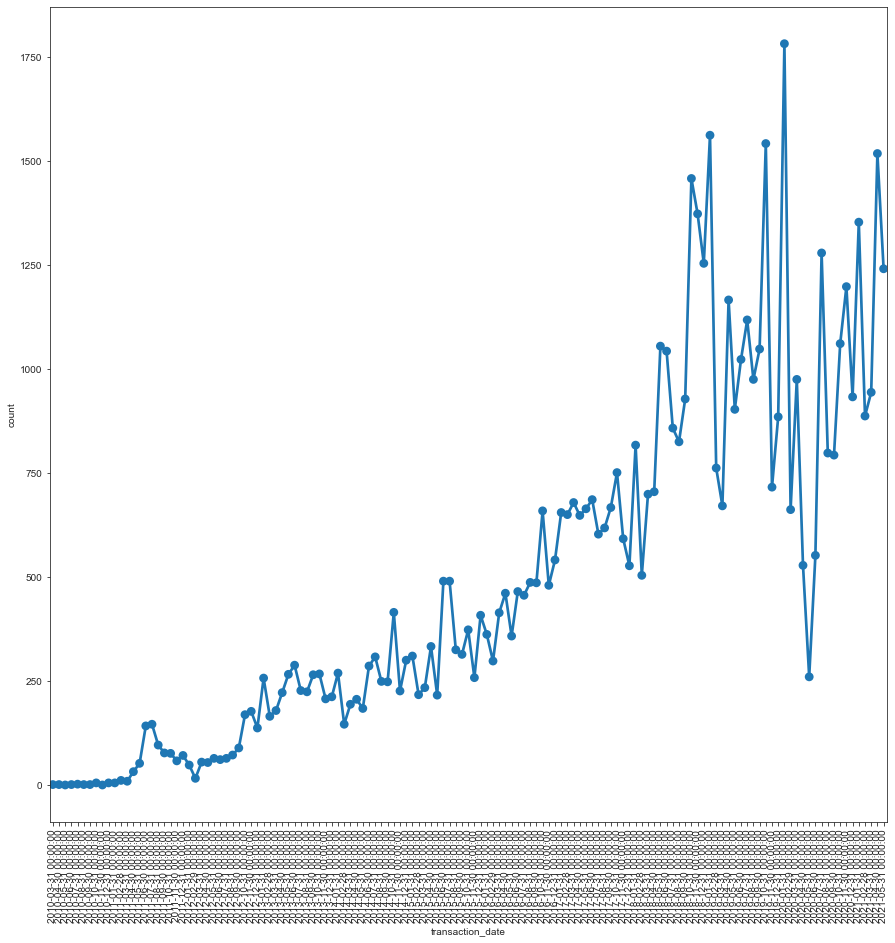

In [279]:
import seaborn as sns
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(15,15))
sns.pointplot(x=df_county_monthly.index, y='count', data=df_county_monthly)
plt.xticks(rotation=90);

In [267]:
df_county.sort_index()

,count
transaction_date,
2010-03-29,1
2010-04-30,1
2010-06-22,1
2010-07-16,1
2010-07-28,1
...,...
2021-05-29,1
2021-05-29,1
2021-05-29,1


In [258]:
def separate_data_by_county(county):
    df_county = df[df['county']==county]
    df_county=df_county.loc[:, ['m/y','count']]
    df_county=df_county.groupby('m/y').sum()
    df_county.columns=['EV Purchase Count']
    df_county.reset_index()
    df_county['m/y'] = 
    return df_county

In [259]:
df_king = separate_data_by_county('King')
df_king

,EV Purchase Count
m/y,
01-2011,5
01-2012,48
01-2013,257
01-2014,269
01-2015,310
...,...
12-2016,541
12-2017,527
12-2018,1254


### EV's On the Road by month/year by county

In [280]:
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y,count
transaction_date,,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,Original Title,King,MEDINA,98039,200,Passenger,WA,348693390,50,Actual Mileage,01-2017,1
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,Original Title,King,SNOQUALMIE,98065,200,Passenger,WA,329748177,50,Actual Mileage,03-2017,1
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,Original Title,Island,OAK HARBOR,98277,53,Passenger,WA,242531271,99,Actual Mileage,03-2017,1
2017-02-15,Battery Electric Vehicle (BEV),KNDCB3LCXH,2017,KIA,Niro,New,22890.0,Original Title,King,KENT,98042,0,Passenger,WA,200890098,5,Actual Mileage,02-2017,1
2016-12-30,Battery Electric Vehicle (BEV),1N4BZ0CP2G,2016,NISSAN,Leaf,New,32500.0,Original Title,Snohomish,MILL CREEK,98012,84,Passenger,WA,117062585,16,Actual Mileage,12-2016,1


In [281]:
df[df['vin_1_10']=='5YJXCBE2XG']

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y,count
transaction_date,,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.00,Original Title,King,MEDINA,98039,200,Passenger,WA,348693390,50,Actual Mileage,01-2017,1
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,122200.00,Original Title,King,REDMOND,98053,200,Passenger,WA,115585858,50,Actual Mileage,01-2017,1
2019-01-15,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,Used,0.00,Original Title,King,REDMOND,98052,200,Passenger,WA,110216151,23038,Actual Mileage,01-2019,1
2016-10-22,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,0.00,Original Title,King,SAMMAMISH,98075,200,Passenger,WA,156805372,50,Actual Mileage,10-2016,1
2017-03-21,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,Used,120674.75,Transfer Title,King,SEATTLE,98109,200,Passenger,WA,242451695,2087,Actual Mileage,03-2017,1
2019-02-21,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,Used,77100.00,Original Title,Island,CLINTON,98236,200,Passenger,WA,326703681,22011,Actual Mileage,02-2019,1
2019-07-11,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,Used,69100.00,Transfer Title,Thurston,ROCHESTER,98579,200,Passenger,WA,265836028,21461,Actual Mileage,07-2019,1
2016-07-20,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,0.00,Original Title,Chelan,WENATCHEE,98801,200,Passenger,WA,141163543,50,Actual Mileage,07-2016,1
2016-06-17,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,0.00,Original Title,King,SEATTLE,98105,200,Passenger,WA,125757852,50,Actual Mileage,06-2016,1


In [287]:
df[df.duplicated(subset=['m/y', 'dol_vehicle_id', 'county'], keep=False)].sort_values('dol_vehicle_id')

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y,count
transaction_date,,,,,,,,,,,,,,,,,,,
2018-12-10,Plug-in Hybrid Electric Vehicle (PHEV),WBY1Z4C57G,2016,BMW,I3,Used,19967.0,Transfer Title,King,KIRKLAND,98033,72,Passenger,WA,46112,19433,Actual Mileage,12-2018,1
2019-06-19,Battery Electric Vehicle (BEV),KNDJP3AEXG,2016,KIA,Soul,Used,11000.0,Transfer Title,Benton,RICHLAND,99352,93,Passenger,WA,110708,26166,Actual Mileage,06-2019,1
2019-09-26,Plug-in Hybrid Electric Vehicle (PHEV),1G1RC6S54H,2017,CHEVROLET,Volt,Used,18276.0,Transfer Title,Clark,VANCOUVER,98685,53,Passenger,WA,1069358,35710,Actual Mileage,09-2019,1
2018-05-18,Battery Electric Vehicle (BEV),1G1FX6S06J,2018,CHEVROLET,Bolt Ev,New,41044.0,Original Title,King,REDMOND,98052,238,Passenger,WA,1225059,53,Actual Mileage,05-2018,1
2017-01-24,Battery Electric Vehicle (BEV),1N4AZ0CP1D,2013,NISSAN,Leaf,Used,7719.0,Original Title,Skagit,MT VERNON,98273,75,Passenger,WA,1250350,30592,Actual Mileage,01-2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-05,Battery Electric Vehicle (BEV),5YJ3E1EB5K,2019,TESLA,Model 3,New,49190.0,Original Title,Snohomish,WOODINVILLE,98072,220,Passenger,WA,478711656,50,Actual Mileage,10-2019,1
2019-10-03,Battery Electric Vehicle (BEV),5YJ3E1EAXK,2019,TESLA,Model 3,New,40190.0,Original Title,King,SEATTLE,98121,220,Passenger,WA,478827219,50,Actual Mileage,10-2019,1
2019-10-09,Battery Electric Vehicle (BEV),5YJ3E1EB1K,2019,TESLA,Model 3,New,55190.0,Original Title,King,SEATTLE,98109,220,Passenger,WA,478846056,50,Actual Mileage,10-2019,1


In [289]:
df.drop_duplicates(subset=['m/y', 'dol_vehicle_id', 'county'], keep='last', inplace=True)

In [290]:
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y,count
transaction_date,,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,Original Title,King,MEDINA,98039,200,Passenger,WA,348693390,50,Actual Mileage,01-2017,1
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,Original Title,King,SNOQUALMIE,98065,200,Passenger,WA,329748177,50,Actual Mileage,03-2017,1
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,Original Title,Island,OAK HARBOR,98277,53,Passenger,WA,242531271,99,Actual Mileage,03-2017,1
2017-02-15,Battery Electric Vehicle (BEV),KNDCB3LCXH,2017,KIA,Niro,New,22890.0,Original Title,King,KENT,98042,0,Passenger,WA,200890098,5,Actual Mileage,02-2017,1
2016-12-30,Battery Electric Vehicle (BEV),1N4BZ0CP2G,2016,NISSAN,Leaf,New,32500.0,Original Title,Snohomish,MILL CREEK,98012,84,Passenger,WA,117062585,16,Actual Mileage,12-2016,1


In [292]:
df[df.duplicated(subset=['m/y', 'dol_vehicle_id'], keep=False)].sort_values('dol_vehicle_id')

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y,count
transaction_date,,,,,,,,,,,,,,,,,,,
2017-05-12,Plug-in Hybrid Electric Vehicle (PHEV),KNAGV4LDXH,2017,KIA,Optima,New,36395.0,Original Title,Yakima,YAKIMA,98901,29,Passenger,WA,1061763,20,Actual Mileage,05-2017,1
2017-05-12,Plug-in Hybrid Electric Vehicle (PHEV),KNAGV4LDXH,2017,KIA,Optima,New,36395.0,Original Title,Walla Walla,WALLA WALLA,99362,29,Passenger,WA,1061763,20,Actual Mileage,05-2017,1
2018-03-30,Plug-in Hybrid Electric Vehicle (PHEV),5UXKT0C59G,2016,BMW,X5,Used,38977.0,Transfer Title,King,BELLEVUE,98004,14,Passenger,WA,1121270,42505,Actual Mileage,03-2018,1
2018-03-30,Plug-in Hybrid Electric Vehicle (PHEV),5UXKT0C59G,2016,BMW,X5,Used,38977.0,Transfer Title,Whatcom,BLAINE,98230,14,Passenger,WA,1121270,42505,Actual Mileage,03-2018,1
2018-12-07,Battery Electric Vehicle (BEV),1N4AZ0CPXF,2015,NISSAN,Leaf,Used,11991.0,Transfer Title,Snohomish,LYNNWOOD,98036,84,Passenger,WA,1155164,28482,Actual Mileage,12-2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,Battery Electric Vehicle (BEV),5YJ3E1EB4K,2019,TESLA,Model 3,New,56190.0,Original Title,Thurston,LACEY,98516,220,Passenger,WA,478598431,50,Actual Mileage,10-2019,1
2019-10-05,Battery Electric Vehicle (BEV),5YJ3E1EB5K,2019,TESLA,Model 3,New,56190.0,Original Title,Benton,RICHLAND,99352,220,Passenger,WA,478679400,50,Actual Mileage,10-2019,1
2019-10-05,Battery Electric Vehicle (BEV),5YJ3E1EB5K,2019,TESLA,Model 3,New,56190.0,Original Title,Adams,OTHELLO,99344,220,Passenger,WA,478679400,50,Actual Mileage,10-2019,1


In [294]:
df.drop_duplicates(subset=['m/y', 'dol_vehicle_id'], keep='last', inplace=True)

In [295]:
df[df.duplicated(subset=['m/y', 'dol_vehicle_id'], keep=False)].sort_values('dol_vehicle_id')

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y,count
transaction_date,,,,,,,,,,,,,,,,,,,


In [296]:
df[df['transaction_type']=='Transfer Title']

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y,count
transaction_date,,,,,,,,,,,,,,,,,,,
2016-12-21,Plug-in Hybrid Electric Vehicle (PHEV),1G1RB6E44C,2012,CHEVROLET,Volt,Used,0.00,Transfer Title,Clark,VANCOUVER,98682,35,Passenger,WA,143092715,42000,Actual Mileage,12-2016,1
2017-04-19,Plug-in Hybrid Electric Vehicle (PHEV),WBY1Z4C59E,2014,BMW,I3,Used,33000.00,Transfer Title,Skagit,BOW,98232,72,Passenger,WA,152034578,14024,Actual Mileage,04-2017,1
2017-02-01,Battery Electric Vehicle (BEV),1N4AZ0CP1D,2013,NISSAN,Leaf,Used,7500.00,Transfer Title,King,KIRKLAND,98034,75,Passenger,WA,155834304,23234,Actual Mileage,02-2017,1
2017-02-02,Plug-in Hybrid Electric Vehicle (PHEV),1G1RD6E47D,2013,CHEVROLET,Volt,Used,13995.00,Transfer Title,Clark,VANCOUVER,98682,38,Passenger,WA,216149741,51888,Actual Mileage,02-2017,1
2017-08-11,Battery Electric Vehicle (BEV),1N4AZ0CP2D,2013,NISSAN,Leaf,Used,28800.00,Transfer Title,Pierce,PUYALLUP,98371,75,Passenger,WA,277354759,37116,Actual Mileage,08-2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-02,Battery Electric Vehicle (BEV),1N4AZ0CP4E,2014,NISSAN,Leaf,Used,8788.00,Transfer Title,King,AUBURN,98092,84,Passenger,WA,156154799,38628,Actual Mileage,05-2017,1
2017-03-29,Battery Electric Vehicle (BEV),JN1AZ0CP6B,2011,NISSAN,Leaf,Used,7599.00,Transfer Title,Spokane,SPOKANE,99207,73,Passenger,WA,121389320,24145,Actual Mileage,03-2017,1
2017-04-21,Battery Electric Vehicle (BEV),2T3YL4DV3E,2014,TOYOTA,Rav4,Used,19621.55,Transfer Title,Snohomish,MUKILTEO,98275,103,Passenger,WA,189341463,33739,Actual Mileage,04-2017,1


In [ ]:
# df_grouped = df.groupby(by=['county', 'm/y']).size()
# df_grouped.loc['Adams',:]
# df_grouped.head(50)

#### New Car Purchases = Cars on the Road (Cumulative Sum)

In [309]:
'''Slicing out new car purchases for each county, parsing information to a 
dictionary, changing index to be monthly and taking cumulative sum'''

county_dict = {}
for county in list(df['county'].unique()):
    county_dict[county] = df[
        (df['county']==county)&
        (df['transaction_type']=='Original Title')
    ].resample('M').size().cumsum()

In [314]:
df_cumsum = pd.DataFrame(county_dict)
df_cumsum.fillna(0, inplace=True)
df_cumsum.head()

,King,Island,Snohomish,Clark,Skagit,Thurston,Kitsap,Pierce,Cowlitz,Yakima,Whatcom,Grant,Benton,Garfield,San Juan,Skamania,Spokane,Grays Harbor,Douglas,Clallam,Walla Walla,Chelan,Mason,Stevens,Lewis,Franklin,Jefferson,Kittitas,Adams,Whitman,Pacific,Pend Oreille,Ferry,Asotin,Klickitat,Okanogan,Wahkiakum,Lincoln,Columbia
transaction_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-28,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-31,1.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-04-30,2.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05-31,2.0,0.0,1.0,1.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-06-30,3.0,0.0,1.0,1.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
df['county'].value_counts()

King            62121
Snohomish       12306
Pierce           8949
Clark            6155
Thurston         4110
Kitsap           4104
Whatcom          2963
Spokane          2575
Benton           1277
Island           1251
Skagit           1204
Clallam           708
Jefferson         692
San Juan          663
Cowlitz           537
Chelan            521
Mason             520
Yakima            508
Lewis             437
Grays Harbor      396
Franklin          347
Grant             267
Walla Walla       256
Kittitas          247
Douglas           190
Whitman           159
Klickitat         153
Pacific           136
Stevens           125
Okanogan          104
Skamania          100
Asotin             49
Adams              30
Wahkiakum          28
Pend Oreille       28
Lincoln            25
Ferry              16
Columbia           13
Garfield            2
Name: county, dtype: int64

<AxesSubplot:xlabel='transaction_date'>

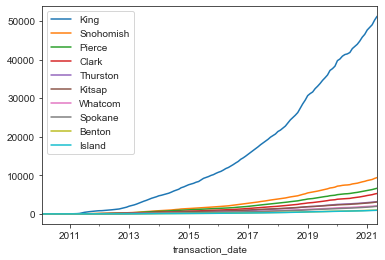

In [316]:
df_cumsum = df_cumsum.loc[:, ['King', 'Snohomish', 'Pierce', 'Clark', 'Thurston', 'Kitsap', 
                  'Whatcom', 'Spokane', 'Benton', 'Island']]
df_cumsum.plot()

<AxesSubplot:xlabel='transaction_date'>

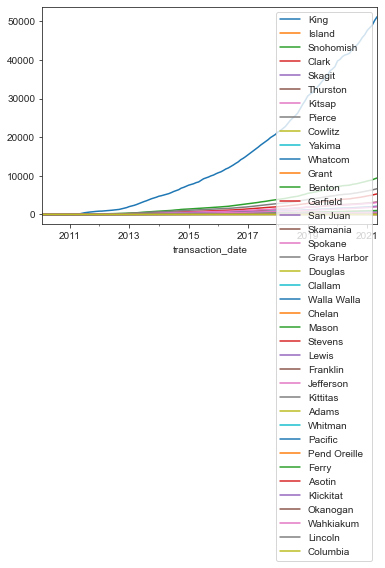

In [312]:
df_cumsum.plot()

In [304]:
df_grouped.cumsum()

county  m/y    
Adams   01-2020         2
        01-2021         3
        02-2015         4
        02-2016         5
        02-2017         7
                    ...  
Yakima  12-2016    114241
        12-2017    114245
        12-2018    114256
        12-2019    114260
        12-2020    114272
Length: 3219, dtype: int64

In [121]:
df[df['dol_vehicle_id']==477791625]

,transaction_date,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
53171,2019-09-13,Battery Electric Vehicle (BEV),5YJ3E1EA2K,2019,TESLA,Model 3,New,41690.0,Original Title,Clark,VANCOUVER,98683.0,220,Passenger,WA,477791625,50,Actual Mileage,09-2019
63258,2020-02-25,Battery Electric Vehicle (BEV),5YJ3E1EA2K,2019,TESLA,Model 3,Used,43987.0,Transfer Title,Snohomish,BOTHELL,98021.0,220,Passenger,WA,477791625,4803,Actual Mileage,02-2020
111792,2020-12-31,Battery Electric Vehicle (BEV),5YJ3E1EA2K,2019,TESLA,Model 3,Used,30000.0,Transfer Title,Skagit,BURLINGTON,98233.0,220,Passenger,WA,477791625,10715,Actual Mileage,12-2020


In [72]:
df_new_cars = df[(df['transaction_type']=='Original Title')]

In [73]:
df_new_cars.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96961 entries, 2017-01-31 to 2017-05-01
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   electric_vehicle_type  96961 non-null  object 
 1   vin_1_10               96961 non-null  object 
 2   model_year             96961 non-null  int64  
 3   make                   96961 non-null  object 
 4   model                  96961 non-null  object 
 5   new_or_used_vehicle    96961 non-null  object 
 6   sale_price             96961 non-null  float64
 7   transaction_type       96961 non-null  object 
 8   county                 96956 non-null  object 
 9   city                   96939 non-null  object 
 10  zip                    96958 non-null  float64
 11  electric_range         96961 non-null  int64  
 12  vehicle_primary_use    96961 non-null  object 
 13  state_of_residence     96961 non-null  object 
 14  dol_vehicle_id         96961 non-null

In [25]:
len(df_new_cars['dol_vehicle_id'].unique())

91296

In [26]:
df_new_cars['transaction_type'].value_counts()

Original Title    96961
Name: transaction_type, dtype: int64

In [27]:
df_new_cars[df_new_cars['dol_vehicle_id'].duplicated()]

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code
transaction_date,,,,,,,,,,,,,,,,,
2018-06-21,Plug-in Hybrid Electric Vehicle (PHEV),2C4RC1N70J,2018,CHRYSLER,Pacifica,New,46100.0,Original Title,Kitsap,BREMERTON,98311.0,33,Passenger,WA,185017913,21,Actual Mileage
2017-07-12,Plug-in Hybrid Electric Vehicle (PHEV),1G1RE6E48E,2014,CHEVROLET,Volt,Used,14900.0,Original Title,Thurston,OLYMPIA,98513.0,38,Passenger,WA,332189693,45700,Actual Mileage
2017-06-30,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S54H,2017,CHEVROLET,Volt,New,34095.0,Original Title,Pierce,ROY,98580.0,53,Passenger,WA,300952816,389,Actual Mileage
2017-12-01,Plug-in Hybrid Electric Vehicle (PHEV),1G1RB6S5XH,2017,CHEVROLET,Volt,New,37570.0,Original Title,Snohomish,LYNNWOOD,98037.0,53,Passenger,WA,118520461,99,Actual Mileage
2017-09-22,Plug-in Hybrid Electric Vehicle (PHEV),JTDKN3DP1F,2015,TOYOTA,Prius Plug-in,Used,17777.0,Original Title,Whitman,PULLMAN,99163.0,6,Passenger,WA,313766127,33451,Actual Mileage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-25,Battery Electric Vehicle (BEV),5YJSA1E21G,2016,TESLA,Model S,New,91700.0,Original Title,Snohomish,LYNNWOOD,98036.0,210,Passenger,WA,348359952,50,Actual Mileage
2017-02-02,Battery Electric Vehicle (BEV),5YJSA1E26G,2016,TESLA,Model S,New,76700.0,Original Title,King,REDMOND,98053.0,210,Passenger,WA,349789597,50,Actual Mileage
2017-03-16,Battery Electric Vehicle (BEV),5YJSA1E25H,2017,TESLA,Model S,New,106950.0,Original Title,Whatcom,CUSTER,98240.0,210,Passenger,WA,113869640,50,Actual Mileage


# EXPLORE

## Most Purchased Cars by County

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
def model_counts_by_county(df=df, top_n=10):
    county_list = list(df['county'].unique()) 
    fig, ax = plt.subplots(figsize=(10, 150), nrows=len(county_list))
    
    for i, county in enumerate(county_list):
        df_county = df[df['county']==county]
        model_count_df = pd.DataFrame(df_county['model'].value_counts()).reset_index()
        model_count_df.columns=['model', 'count']
        sns.barplot(x='model', y='count', data=model_count_df.head(top_n), ax=ax[i])
        ax[i].set_title(f'Top {top_n} Most Purchased Models in {county} County (2010-2021)')
    plt.tight_layout();

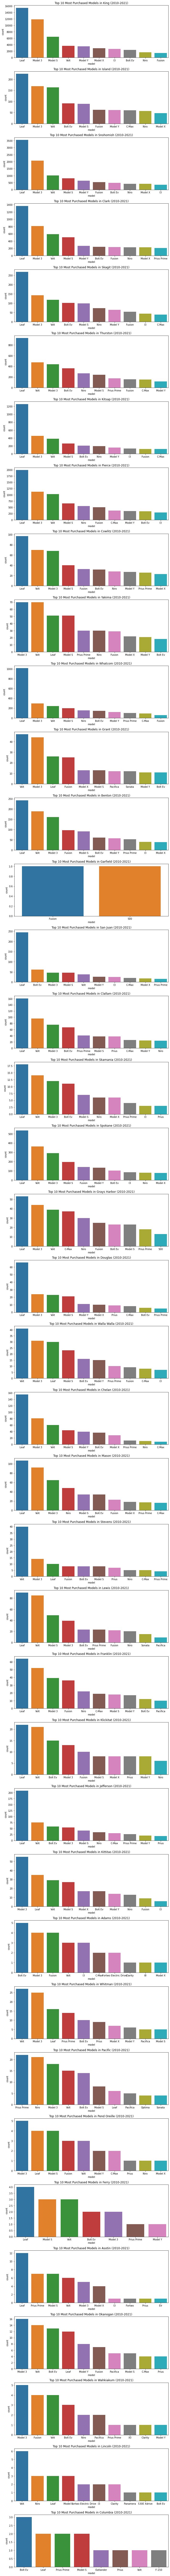

In [243]:
model_counts_by_county()

In [244]:
df['county'].value_counts()

King            65437
Snohomish       12975
Pierce           9424
Clark            6368
Thurston         4292
Kitsap           4242
Whatcom          3073
Spokane          2693
Benton           1316
Island           1316
Skagit           1278
Clallam           741
Jefferson         715
San Juan          694
Cowlitz           562
Mason             562
Chelan            557
Yakima            530
Lewis             458
Grays Harbor      419
Franklin          354
Grant             286
Kittitas          282
Walla Walla       265
Douglas           209
Whitman           163
Klickitat         158
Pacific           142
Stevens           129
Okanogan          112
Skamania          103
Asotin             50
Adams              33
Pend Oreille       29
Wahkiakum          28
Lincoln            27
Ferry              16
Columbia           13
Garfield            2
Name: county, dtype: int64

In [245]:
df.head()

,electric_vehicle_type,vin_1_10,model_year,make,model,new_or_used_vehicle,sale_price,transaction_type,county,city,zip,electric_range,vehicle_primary_use,state_of_residence,dol_vehicle_id,odometer_reading,odometer_code,m/y
transaction_date,,,,,,,,,,,,,,,,,,
2017-01-31,Battery Electric Vehicle (BEV),5YJXCBE2XG,2016,TESLA,Model X,New,102000.0,Original Title,King,MEDINA,98039,200,Passenger,WA,348693390,50,Actual Mileage,01-2017
2017-03-22,Battery Electric Vehicle (BEV),5YJXCBE49H,2017,TESLA,Model X,New,166250.0,Original Title,King,SNOQUALMIE,98065,200,Passenger,WA,329748177,50,Actual Mileage,03-2017
2017-03-24,Plug-in Hybrid Electric Vehicle (PHEV),1G1RA6S59H,2017,CHEVROLET,Volt,New,32499.0,Original Title,Island,OAK HARBOR,98277,53,Passenger,WA,242531271,99,Actual Mileage,03-2017
2017-02-15,Battery Electric Vehicle (BEV),KNDCB3LCXH,2017,KIA,Niro,New,22890.0,Original Title,King,KENT,98042,0,Passenger,WA,200890098,5,Actual Mileage,02-2017
2016-12-30,Battery Electric Vehicle (BEV),1N4BZ0CP2G,2016,NISSAN,Leaf,New,32500.0,Original Title,Snohomish,MILL CREEK,98012,84,Passenger,WA,117062585,16,Actual Mileage,12-2016


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

# MODEL

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

# iNTERPRET

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

# CONCLUSIONS & RECOMMENDATIONS

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***